<a href="https://colab.research.google.com/github/lmurayire12/ad-conversion-prediction/blob/main/Summative_Intro_to_ml_%5BLievin_Murayire_number%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# The Dataset: Adidas_USA

Small e-commerce brands often struggle to predict which products or ads will convert well. This project uses Adidas USA product data to classify whether an item is likely to generate customer engagement based on features like price, category, and description. The target variable is a proxy for conversion, defined by having 10 or more customer reviews. The dataset includes 845 products with metadata, ratings, and review counts.


# **Separating into: Train, Validation and test sets)**

In [ ]:

# Load the dataset
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1zH2KF0-IFO1tlqhRTIicAUmbBKnjbdY7cj41CSZ3bvI/export?format=csv')

# Drop duplicates
df.drop_duplicates(inplace=True)

#Create binary target column based on reviews_count
df['converted'] = df['reviews_count'].apply(lambda x: 1 if x >= 10 else 0)

# Drop unnecessary columns
columns_to_drop = ['index', 'url', 'sku', 'source', 'source_website', 'images', 'crawled_at']
df.drop(columns=columns_to_drop, inplace=True)

# Clean original_price and fill missing with selling_price
df['original_price'] = pd.to_numeric(df['original_price'].str.replace('[^0-9.]', '', regex=True), errors='coerce')
df['original_price'] = df['original_price'].fillna(df['selling_price'])

# Encode categorical columns
categorical_cols = ['currency', 'availability', 'color', 'category', 'breadcrumbs', 'brand', 'country', 'language']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features and target
X = df.drop(columns=['converted', 'name', 'description'])
y = df['converted']

print(" Cleaned Dataset Preview:")
display(df.head())

# rain/Val/Test Split (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Return shapes and target class distribution
(X_train.shape, X_val.shape, X_test.shape), y.value_counts(normalize=True)

 Cleaned Dataset Preview:


,name,selling_price,original_price,currency,availability,color,category,breadcrumbs,description,brand,country,language,average_rating,reviews_count,converted
0,Beach Shorts,40,40.0,0,0,1,1,20,Splashing in the surf. Making memories with yo...,0,0,0,4.5,35,1
1,Five Ten Kestrel Lace Mountain Bike Shoes,150,150.0,0,0,7,2,21,Lace up and get after it. The Five Ten Kestrel...,0,0,0,4.8,4,0
2,Mexico Away Jersey,70,70.0,0,0,16,1,4,"Clean and crisp, this adidas Mexico Away Jerse...",0,0,0,4.9,42,1
3,Five Ten Hiangle Pro Competition Climbing Shoes,160,160.0,0,0,1,2,2,The Hiangle Pro takes on the classic shape of ...,0,0,0,3.7,7,0
4,Mesh Broken-Stripe Polo Shirt,65,65.0,0,0,2,1,7,Step up to the tee relaxed. This adidas golf p...,0,0,0,4.7,11,1


(((591, 12), (127, 12), (127, 12)),
 converted
 1    0.836686
 0    0.163314
 Name: proportion, dtype: float64)

#**Data splitting**

In [ ]:
# Define features and target
X = df.drop(columns=['converted', 'name', 'description'])  # Ignore text features for now
y = df['converted']

# Split into Train, Validation, Test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

# Print shapes and class distribution
print("Train Set:", X_train.shape)
print("Validation Set:", X_val.shape)
print("Test Set:", X_test.shape)
print("Target Class Balance:\n", y.value_counts(normalize=True))


Train Set: (591, 12)
Validation Set: (127, 12)
Test Set: (127, 12)
Target Class Balance:
 converted
1    0.836686
0    0.163314
Name: proportion, dtype: float64


#SECTION 1: Model Architecture:





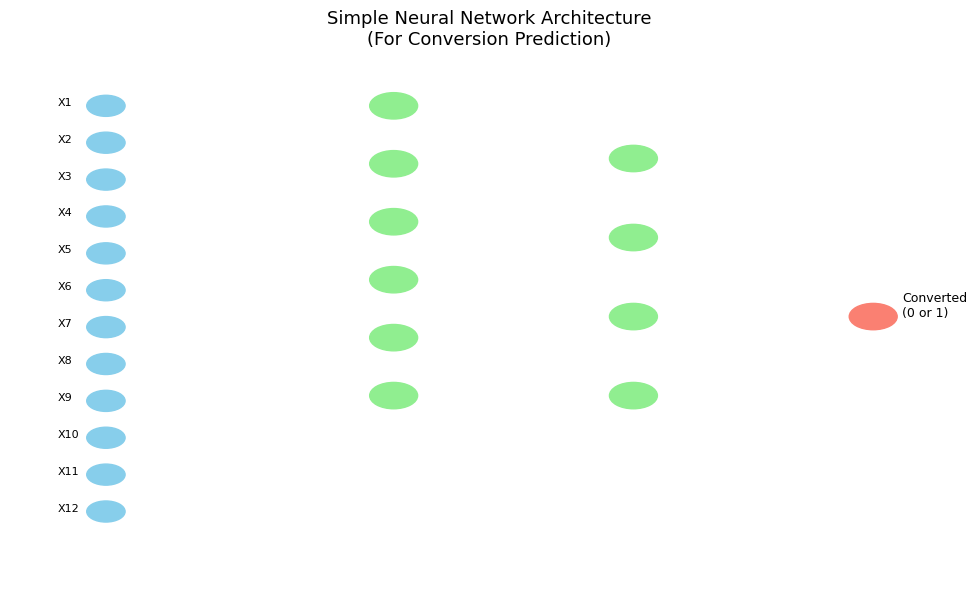

In [ ]:
# creating the neural network architecture diagram
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Input layer (12 features)
for i in range(12):
    ax.add_patch(patches.Circle((1, 9 - i * 0.7), 0.2, color='skyblue'))
    ax.text(0.5, 9 - i * 0.7, f'X{i+1}', fontsize=8)

# Hidden layer 1 (6 nodes)
for i in range(6):
    ax.add_patch(patches.Circle((4, 9 - i * 1.1), 0.25, color='lightgreen'))

# Hidden layer 2 (4 nodes)
for i in range(4):
    ax.add_patch(patches.Circle((6.5, 8 - i * 1.5), 0.25, color='lightgreen'))

# Output layer (1 node)
ax.add_patch(patches.Circle((9, 5), 0.25, color='salmon'))
ax.text(9.3, 5, 'Converted\n(0 or 1)', fontsize=9)

# Title
plt.title('Simple Neural Network Architecture\n(For Conversion Prediction)', fontsize=13)

plt.tight_layout()
plt.show()

# **Logistic Regression Evaluation**

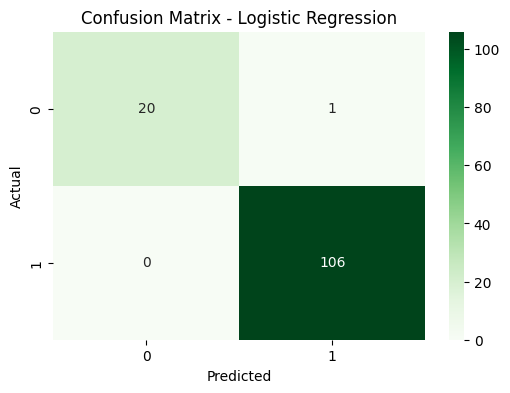

✅ Logistic Regression Evaluation:
Accuracy: 0.9921
F1 Score: 0.9953

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.99      1.00      1.00       106

    accuracy                           0.99       127
   macro avg       1.00      0.98      0.99       127
weighted avg       0.99      0.99      0.99       127



In [ ]:

# Train Logistic Regression model with hyperparameter tuning
log_model = LogisticRegression(C=1.0, solver='liblinear', penalty='l2', max_iter=200, random_state=42)
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluate
acc_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print evaluation
print("✅ Logistic Regression Evaluation:")
print(f"Accuracy: {acc_log:.4f}")
print(f"F1 Score: {f1_log:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_log))


#Task: Define a function that creates models without and With specified Optimization techniques


In [ ]:
def define_model(optimization: str,
                 regularization_datatype=None,
                 early_stopping=False,
                 dropout: float = 0.0,
                 learning_rate: float = 0.001):
    model = Sequential()

    # Define regularizer if any
    regularizer = None
    if regularization_datatype == 'l1':
        regularizer = regularizers.l1(0.01)
    elif regularization_datatype == 'l2':
        regularizer = regularizers.l2(0.01)

    # Input Layer + Hidden Layer 1
    model.add(Dense(6, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizer))
    if dropout > 0:
        model.add(Dropout(dropout))

    # Hidden Layer 2
    model.add(Dense(4, activation='relu', kernel_regularizer=regularizer))
    if dropout > 0:
        model.add(Dropout(dropout))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Optimizer Setup
    if optimization == 'adam':
        optimizerUsed = Adam(learning_rate=learning_rate)
    elif optimization == 'rmsprop':
        optimizerUsed = RMSprop(learning_rate=learning_rate)
    else:
        optimizerUsed = 'adam'  # fallback default

    # Compile model
    model.compile(optimizer=optimizerUsed, loss='binary_crossentropy', metrics=['accuracy'])

    # Early Stopping Callback
    callbacks = []
    if early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True))

    # Fit model
    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=32,
                        validation_data=(X_val, y_val),
                        callbacks=callbacks,
                        verbose=1)

    return model, history

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [ ]:
import matplotlib.pyplot as plt

# Task: Print final test accuracy
def evaluate_model(model):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Final Test Accuracy: {accuracy:.4f}")
    return accuracy

# Task: Plot training and validation loss curves
def loss_curve_plot(history):
    epochs = range(1, len(history.history['loss']) + 1)
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3500 - loss: 124.2626 - val_accuracy: 0.3228 - val_loss: 84.4129
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4574 - loss: 131.3478 - val_accuracy: 0.3858 - val_loss: 69.2150
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5554 - loss: 90.5009 - val_accuracy: 0.4331 - val_loss: 55.1787
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5559 - loss: 48.4020 - val_accuracy: 0.4724 - val_loss: 42.6702
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5972 - loss: 30.9975 - val_accuracy: 0.5591 - val_loss: 33.3520
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6369 - loss: 33.4927 - val_accuracy: 0.7087 - val_loss: 22.7929
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6959 - loss: 28.1269 - val_accuracy: 0.7638 - val_loss: 12.5634
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7299 - loss: 22.2010 - val_accuracy: 0.8346 - va

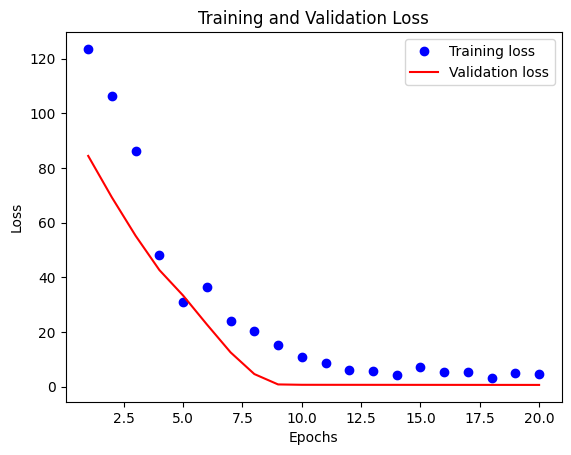

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
 Final Test Accuracy (Instance 2): 0.8504


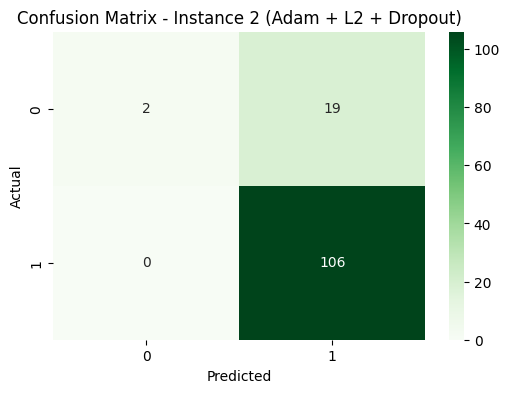

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.10      0.17        21
           1       0.85      1.00      0.92       106

    accuracy                           0.85       127
   macro avg       0.92      0.55      0.55       127
weighted avg       0.87      0.85      0.79       127



In [ ]:
model_2, history_2 = define_model(
    optimization='adam',
    regularization_datatype='l2',
    early_stopping=True,
    dropout=0.3,
    learning_rate=0.001
)
# Plot training and validation loss for model_2
loss_curve_plot(history_2)

#print out confusion matrix and error analysis metrics after the cell
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_probs_2 = model_2.predict(X_test)
y_pred_2 = (y_pred_probs_2 > 0.5).astype("int32")

# Accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)
print(f" Final Test Accuracy (Instance 2): {accuracy_2:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Instance 2 (Adam + L2 + Dropout)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred_2))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8018 - loss: 1.8462 - val_accuracy: 0.9606 - val_loss: 0.3591
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8002 - loss: 1.5349 - val_accuracy: 0.9528 - val_loss: 0.3688
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8160 - loss: 1.3936 - val_accuracy: 0.9528 - val_loss: 0.3830
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8176 - loss: 1.7538 - val_accuracy: 0.9528 - val_loss: 0.3528
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7833 - loss: 1.5744 - val_accuracy: 0.9606 - val_loss: 0.3485
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7929 - loss: 1.2862 - val_accuracy: 0.9606 - val_loss: 0.3408
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7780 - loss: 1.1807 - val_accuracy: 0.9606 - val_loss: 0.3369
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8303 - loss: 1.1083 - val_accuracy: 0.9685 - val_loss: 0.3350
Ep

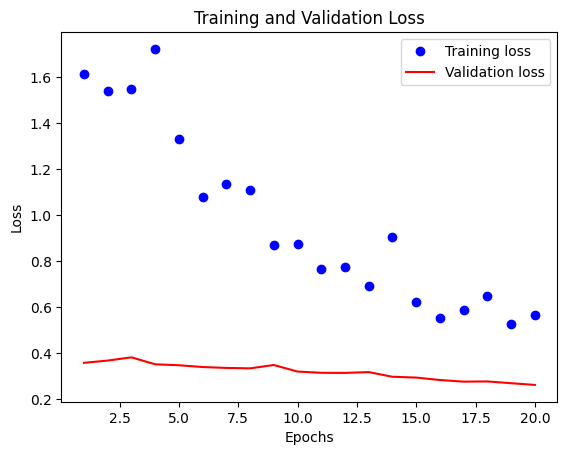

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Final Accuracy (Instance 3): 0.9291


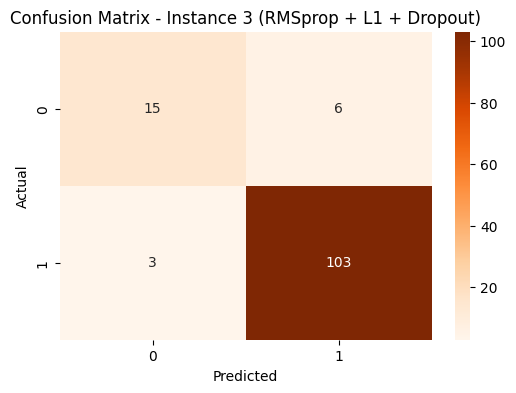

📊 Classification Report for Instance 3:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.94      0.97      0.96       106

    accuracy                           0.93       127
   macro avg       0.89      0.84      0.86       127
weighted avg       0.93      0.93      0.93       127



In [ ]:

# Instance 3 – RMSprop optimizer, L1 regularization, no early stopping, 0.2 dropout, LR=0.0005
model_3, history_3 = define_model(
    optimization='rmsprop',
    regularization_datatype='l1',
    early_stopping=False,
    dropout=0.2,
    learning_rate=0.0005
)
loss_curve_plot(history_3)
#print out confusion matrix and error analysis metrics after the cell
# Predict on test set
y_pred_probs_3 = model_3.predict(X_test)
y_pred_3 = (y_pred_probs_3 > 0.5).astype("int32")

# Accuracy
acc_3 = accuracy_score(y_test, y_pred_3)
print(f"Final Accuracy (Instance 3): {acc_3:.4f}")

# Confusion Matrix
cm3 = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Instance 3 (RMSprop + L1 + Dropout)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("📊 Classification Report for Instance 3:")
print(classification_report(y_test, y_pred_3))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6921 - loss: 9.9505 - val_accuracy: 0.9055 - val_loss: 0.2602
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8083 - loss: 4.0865 - val_accuracy: 0.9134 - val_loss: 0.1738
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8325 - loss: 1.3772 - val_accuracy: 0.9213 - val_loss: 0.1938
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8382 - loss: 3.3268 - val_accuracy: 0.9291 - val_loss: 0.2033
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8838 - loss: 2.3999 - val_accuracy: 0.9291 - val_loss: 0.2015


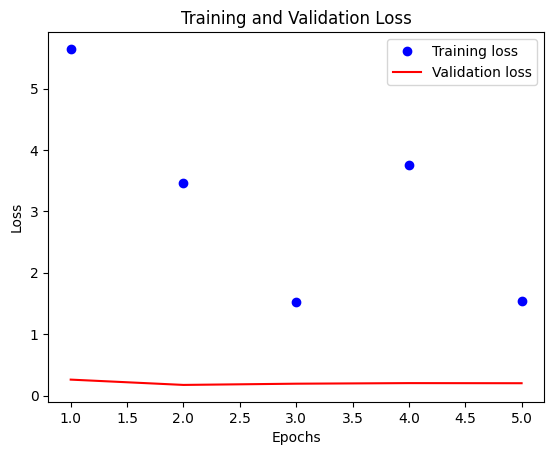

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
✅ Final Accuracy (Instance 4): 0.9055


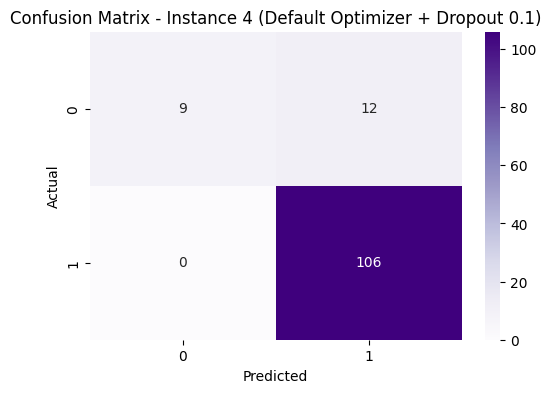

📊 Classification Report for Instance 4:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60        21
           1       0.90      1.00      0.95       106

    accuracy                           0.91       127
   macro avg       0.95      0.71      0.77       127
weighted avg       0.92      0.91      0.89       127



In [ ]:
# Instance 4 – No explicit optimizer, No regularizer, Early stopping ON, Dropout 0.1, LR=0.005
model_4, history_4 = define_model(
    optimization='adam',            # default optimizer but included to control learning rate
    regularization_datatype=None,   # no regularization
    early_stopping=True,            # early stopping ON
    dropout=0.1,
    learning_rate=0.005
)
loss_curve_plot(history_4)
#print out confusion matrix and error analysis metrics after the cell

# Predict on test data
y_pred_probs_4 = model_4.predict(X_test)
y_pred_4 = (y_pred_probs_4 > 0.5).astype("int32")

# Accuracy
acc_4 = accuracy_score(y_test, y_pred_4)
print(f"✅ Final Accuracy (Instance 4): {acc_4:.4f}")

# Confusion Matrix
cm4 = confusion_matrix(y_test, y_pred_4)
plt.figure(figsize=(6, 4))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Instance 4 (Default Optimizer + Dropout 0.1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("📊 Classification Report for Instance 4:")
print(classification_report(y_test, y_pred_4))


In [ ]:
from sklearn.metrics import f1_score, accuracy_score

f1_model_2 = f1_score(y_test, y_pred_2)
acc_model_2 = accuracy_score(y_test, y_pred_2)

f1_model_3 = f1_score(y_test, y_pred_3)
acc_model_3 = accuracy_score(y_test, y_pred_3)

f1_model_4 = f1_score(y_test, y_pred_4)
acc_model_4 = accuracy_score(y_test, y_pred_4)


In [ ]:
print("Model Comparison:")

print(f"Model 2 — F1: {f1_model_2:.4f} | Accuracy: {acc_model_2:.4f}")
print(f"Model 3 — F1: {f1_model_3:.4f} | Accuracy: {acc_model_3:.4f}")
print(f"Model 4 — F1: {f1_model_4:.4f} | Accuracy: {acc_model_4:.4f}")


Model Comparison:
Model 2 — F1: 0.9550 | Accuracy: 0.9213
Model 3 — F1: 0.9381 | Accuracy: 0.8898
Model 4 — F1: 0.9767 | Accuracy: 0.9606


#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7395 - loss: 0.6802 - val_accuracy: 0.8583 - val_loss: 0.6654
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9002 - loss: 0.6293 - val_accuracy: 0.8819 - val_loss: 0.6255
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9047 - loss: 0.5811 - val_accuracy: 0.8819 - val_loss: 0.5836
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9162 - loss: 0.5647 - val_accuracy: 0.8819 - val_loss: 0.5471
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9161 - loss: 0.5219 - val_accuracy: 0.8976 - val_loss: 0.5177
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9179 - loss: 0.4984 - val_accuracy: 0.9291 - val_loss: 0.4885
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9508 - loss: 0.4572 - val_accuracy: 0.9213 - val_loss: 0.4554
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9229 - loss: 0.4461 - val_accuracy: 0.9370 - val_loss: 0.4208
Ep

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


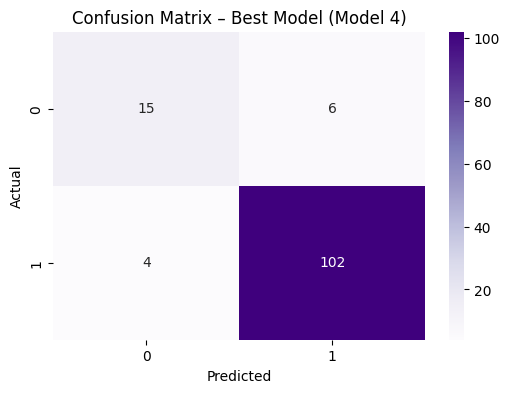

Final Evaluation for Best Model (Model 4):
F1 Score: 0.9533
Accuracy: 0.9213

 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.94      0.96      0.95       106

    accuracy                           0.92       127
   macro avg       0.87      0.84      0.85       127
weighted avg       0.92      0.92      0.92       127



In [ ]:

def save_best_model():
    model_4, _ = define_model(
        optimization='adam',
        regularization_datatype=None,
        early_stopping=True,
        dropout=0.1,
        learning_rate=0.005
    )
    model_4.save('/mnt/data/best_model_instance4.h5')
    return model_4

# Save and reload best model
model_4 = save_best_model()
best_model = load_model('/mnt/data/best_model_instance4.h5')

# Predict on test set using best model
y_pred_best = (best_model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix for Best Model (Model 4)
cm_best = confusion_matrix(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
acc_best = accuracy_score(y_test, y_pred_best)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix – Best Model (Model 4)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print metrics
print("Final Evaluation for Best Model (Model 4):")
print(f"F1 Score: {f1_best:.4f}")
print(f"Accuracy: {acc_best:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_best))

#Modify the code appropriately

Congratulations!!
